In [11]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

read_path = r'C:\Users\Julia\Documents\Uni\Master\1\Data-Literacy\Data\joined_survey_article_standardized_median.csv'
df = pd.read_csv(read_path, delimiter=';', header=0)
df["date"] = pd.to_datetime(df["date"], format="%d.%m.%Y")
df["SPD"] = pd.to_numeric(df["SPD"], errors='coerce')
df["Union"] = pd.to_numeric(df["Union"], errors='coerce')
df["Grüne"] = pd.to_numeric(df["Grüne"], errors='coerce')
df["FDP"] = pd.to_numeric(df["FDP"], errors='coerce')
df["AfD"] = pd.to_numeric(df["AfD"], errors='coerce')
df["Linke"] = pd.to_numeric(df["Linke"], errors='coerce')

In [12]:
# 2003: january, february, march, april -> Irakkrieg
filtered_values = np.where(((df["date"].dt.year <= 2002) & (df["date"].dt.month >= 11)) | ((df["date"].dt.year == 2003) & (df["date"].dt.month <= 5)))
data_war = df.loc[filtered_values]


In [13]:
# regression for each party
x = data_war.index.values.reshape(-1,1)
pred = LinearRegression()
pred.fit(x, data_war[["SPD"]])

LinearRegression()

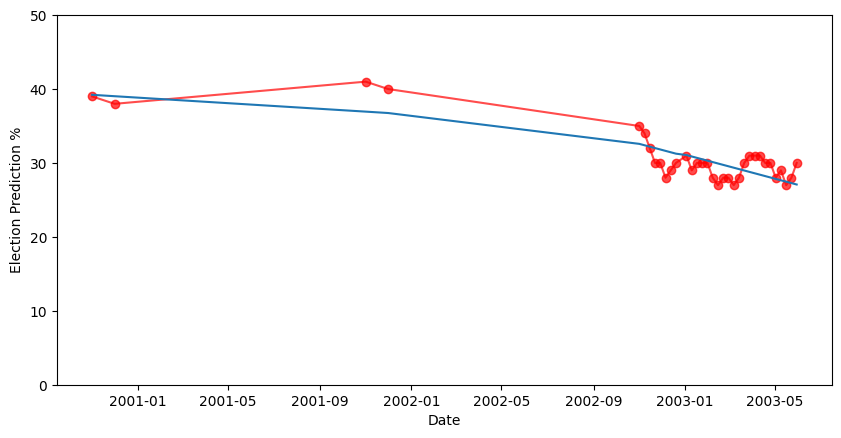

In [14]:
fig, ax1 = plt.subplots()
fig.set_figwidth(10) 
ax1.set_ylim([0, 50])
ax1.set_xlabel('Date') 
ax1.set_ylabel('Election Prediction %')
ax1.plot(data_war['date'], data_war['SPD'], marker='o', linestyle='-',label='SPD', color='red', alpha=0.7)
ax1.plot(data_war[['date']],pred.predict(x))

In [15]:
# line not fitted well -> polynomial regression
# regression for each party
x_poly = data_war.index.values
poly = PolynomialFeatures(degree=5)
poly_features = poly.fit_transform(x_poly.reshape(-1, 1))
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, data_war[["SPD"]])

LinearRegression()

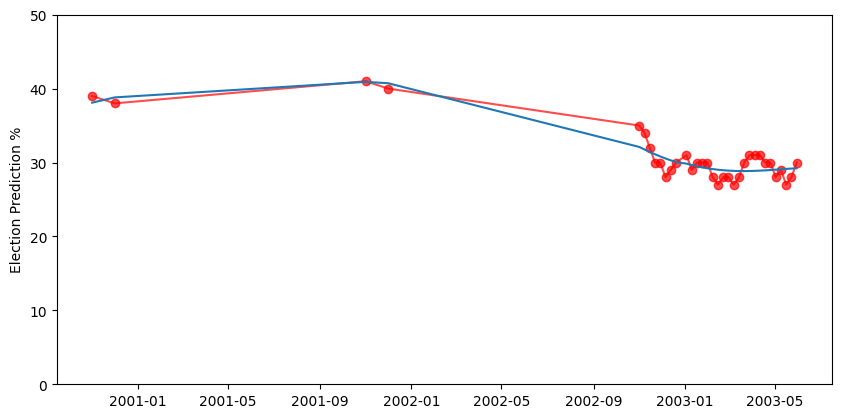

In [16]:
fig, ax1 = plt.subplots()
fig.set_figwidth(10) 
ax1.set_ylim([0, 50])
ax1.set_ylabel('Election Prediction %')
ax1.plot(data_war['date'], data_war['SPD'], marker='o', linestyle='-',label='SPD', color='red', alpha=0.7)
ax1.plot(data_war[['date']],poly_reg_model.predict(poly_features))


In [17]:
# confidence interval with bootstrap
def bootstrap_poly_regression(x, y, degree, n_bootstraps=1000):
    coefs = np.zeros((n_bootstraps, degree + 1))

    for i in range(n_bootstraps):
        indices = np.random.choice(len(x), len(x), replace=True)
        x_boot, y_boot = x[indices], y[indices]

        poly = PolynomialFeatures(degree=degree)
        poly_features = poly.fit_transform(x_boot.reshape(-1, 1))

        model = LinearRegression()
        model.fit(poly_features, y_boot)
        coefs[i, :] = model.coef_

    return coefs

In [18]:
x = data_war.index.values
y = data_war["SPD"].values  

degree = 5  
coefs = bootstrap_poly_regression(x, y, degree)

# Calculate confidence intervals
lower_bound = np.percentile(coefs, 2.5, axis=0)
upper_bound = np.percentile(coefs, 97.5, axis=0)

# upper bound für die coefizienten
# lower bound für die coeffizienten

In [19]:
coefs.shape

(1000, 6)

In [20]:
upper_bound


array([0.00000000e+00, 1.54523914e-01, 4.34708841e+01, 2.06152390e-03,
       1.58034397e-04, 6.84375076e-10])

ValueError: operands could not be broadcast together with shapes (34,) (6,) 

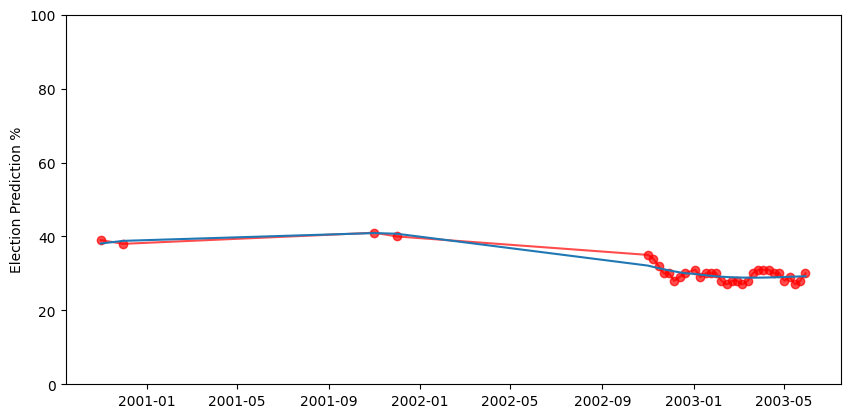

In [21]:
# plots with bootstrap
fig, ax1 = plt.subplots()
fig.set_figwidth(10) 
ax1.set_ylim([0, 100])
ax1.set_ylabel('Election Prediction %')
ax1.plot(data_war['date'], data_war['SPD'], marker='o', linestyle='-', label='SPD', color='red', alpha=0.7)

# Plot the regression line
ax1.plot(data_war[['date']], poly_reg_model.predict(poly_features), label='Regression Line')
# Plot the confidence intervals
ax1.fill_between(data_war['date'], lower_bound, upper_bound, color='blue', alpha=0.2, label='95% Confidence Interval')

plt.legend()
plt.show()